In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
df = pd.read_csv('Resources/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

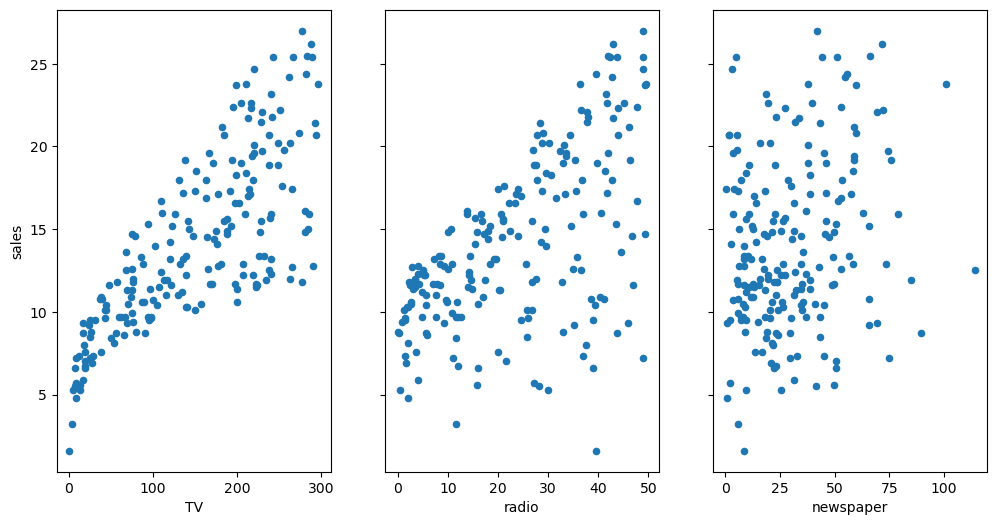

In [4]:
from matplotlib.pyplot import scatter


fig,ax = plt.subplots(1,3, sharey= True)
df.plot(kind='scatter', x = 'TV', y = 'sales',  ax=ax[0], figsize=(12,6))
df.plot(kind='scatter', x='radio', y='sales', ax=ax[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=ax[2])

In [5]:
feature_cols = ['TV']
x = df[feature_cols]
y = df.sales

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [7]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127697
[0.04753664]


In [8]:
# Regression line y = mx + c
0.04753664*(50) + 7.032593549127697

9.409425549127697

In [9]:
x_test = pd.DataFrame({'TV' : [50]})
x_test

,TV
0,50


In [10]:
lm.predict(x_test)
x_test = pd.DataFrame({'TV' : [df.TV.min(), df.TV.max()]})
x_test

,TV
0,0.7
1,296.4


In [11]:
x_test = pd.DataFrame({'TV' : [df.TV.min(), df.TV.max()]})
y_pred = lm.predict(x_test)
y_pred

array([ 7.0658692 , 21.12245377])

In [ ]:
#Plotting regression line
df.plot(kind='scatter', x='TV', y='sales') 
plt.plot(x_test,y_pred) 

In [15]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data = df).fit()

In [19]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [21]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 09 Oct 2022   Prob (F-statistic):           1.47e-42
Time:                        18:55:42   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
feature_cols = ['TV', 'radio', 'newspaper']
X = df[feature_cols]
y = df.sales

from sklearn import model_selection
x_train,x_test, y_train,y_test = model_selection.train_test_split(X,y, test_size = 0.3, random_state = 42)

In [29]:
from audioop import rms
from cv2 import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression()
lm.fit(x_train,y_train)
predictions = lm.predict(x_test)

import math
print(sqrt(mean_squared_error(y_test, predictions)))

[[1.9485372]
 [0.       ]
 [0.       ]
 [0.       ]]


In [30]:
lm = smf.ols(formula='sales ~ TV+radio+newspaper', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 09 Oct 2022   Prob (F-statistic):           1.58e-96
Time:                        19:19:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
lm.rsquared

0.8972106381789522